In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Data preparation

In [3]:
df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})
df_students.columns

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/1080893059.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})


Index(['outid', 'birth', 'sextypename', 'classprofilename', 'regtypename',
       'classlangname', 'KATOTTG_2023', 'EDRPOU_school', 'year', 'status'],
      dtype='object')

In [4]:
df_students = df_students[['outid', 'birth', 'sextypename', 'KATOTTG_2023', 'year', 'EDRPOU_school', 'status']]
df_students

,outid,birth,sextypename,KATOTTG_2023,year,EDRPOU_school,status
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...
2,30de395e-7a74-452a-8370-6856d240fbfb,1999,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,1999,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,1999,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,2003,Male,UA59020070010054283,2023,NaN,A graduate of previous years
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,1996,Female,UA32100010010059200,2023,NaN,A graduate of previous years
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,2004,Female,UA56080170010061049,2023,NaN,A graduate of previous years
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,2005,Female,UA51100270010320268,2023,NaN,A graduate of previous years


In [5]:
df_students['age'] = df_students['year']-df_students['birth']
df_students.drop('birth', axis = 1, inplace=True)
df_students

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17
...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18


In [6]:
df_location = pd.read_csv('../tables_creation/final_tables/locations_base.csv', dtype={'KOATUU_2020': str, 'KATOTTG_2023': str})
df_location = df_location.drop_duplicates(subset=['KATOTTG_2023'], keep='first')
df_location.head()

,KATOTTG_2023,KOATUU_2020,category,ukrainian_name,english_name
0,UA01000000000013043,0100000000,region,Автономна Республіка Крим,Avtonomna Respublika Krym
1,UA01020000000022387,0120400000,district,Бахчисарайський,Bakhchysaraiskyi
2,UA01020010000048857,8536990200,hromada,Андріївська,NaN
3,UA01020010010075540,8536990201,village,Андріївка,NaN
4,UA01020010020030666,8536990203,settlement,Сонячний,NaN


In [7]:
region_df=df_location[df_location.category.isin(['region', 'capital'])][['KATOTTG_2023', 'english_name']]
region_df['KATOTTG_2023_region'] = region_df['KATOTTG_2023'].str[:4]
region_df.drop(columns='KATOTTG_2023', inplace=True)
region_df.reset_index(inplace=True, drop=True)
region_df

,english_name,KATOTTG_2023_region
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [8]:
abroad_df=df_location[(df_location.category=='abroad')&(df_location.KATOTTG_2023.str[4:6]=='00')][['KATOTTG_2023', 'english_name']]
abroad_df['KATOTTG_2023_region'] = abroad_df['KATOTTG_2023'].str[:4]
abroad_df.drop(columns='KATOTTG_2023', inplace=True)
abroad_df.reset_index(inplace=True, drop=True)
abroad_df

,english_name,KATOTTG_2023_region
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [9]:
df_students_region = df_students.merge(df_location[['KATOTTG_2023', 'category']], on = ['KATOTTG_2023'], how = 'left')
df_students_region['KATOTTG_2023_region']=df_students_region['KATOTTG_2023'].str[:4]
df_students_region

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51


In [10]:
df_students_region = df_students_region.merge(region_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,english_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska


In [11]:
df_students_region = df_students_region.merge(abroad_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,english_name_x,english_name_y
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka,NaN
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska,NaN
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska,NaN
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska,NaN
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska,NaN
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska,NaN
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska,NaN
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska,NaN


In [12]:
df_students_region.loc[df_students_region.english_name_x.isna(), 'english_name_x'] =df_students_region.english_name_y

In [13]:
df_students_region.drop(columns='english_name_y', inplace=True)
df_students_region.rename(columns={'english_name_x':'region_name'}, inplace=True)
df_students_region

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,region_name
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,UA23080270010078454,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,UA23,Zaporizka
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,UA68040210010032567,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,UA68,Khmelnytska
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,UA73060610010033137,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,UA73,Chernivetska
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,UA14120030010055241,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,UA14,Donetska
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,UA61040490010069060,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,UA61,Ternopilska
...,...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,UA59020070010054283,2023,NaN,A graduate of previous years,20,city,UA59,Sumska
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,UA32100010010059200,2023,NaN,A graduate of previous years,27,city,UA32,Kyivska
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,UA56080170010061049,2023,NaN,A graduate of previous years,19,city,UA56,Rivnenska
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,UA51100270010320268,2023,NaN,A graduate of previous years,18,districts in cities,UA51,Odeska


In [14]:
df_students_region[df_students_region.region_name.isna()]

,outid,sextypename,KATOTTG_2023,year,EDRPOU_school,status,age,category,KATOTTG_2023_region,region_name


In [15]:
df_students_region.region_name.unique()

array(['Zaporizka', 'Khmelnytska', 'Chernivetska', 'Donetska',
       'Ternopilska', 'Kirovohradska', 'Odeska', 'Dnipropetrovska',
       'Lvivska', 'Ivano-Frankivska', 'Kharkivska', 'Cherkaska',
       'Volynska', 'Poltavska', 'Rivnenska', 'Vinnytska', 'Chernihivska',
       'Kyivska', 'Zakarpatska', 'Kyiv', 'Zhytomyrskа', 'Mykolaivska',
       'Khersonska', 'Luhanska', 'Sumska', 'Poland', 'France', 'Germany',
       'Estonia', 'Norway', 'Slovakia', 'Austia', 'United Kingdom',
       'Ireland', 'Bulgaria', 'Moldova', 'Portugal', 'Azerbaijan',
       'Hungary', 'Italy', 'Turkey', 'Czechia', 'Belgium', 'Spain',
       'Canada', 'Croatia', 'Latvia', 'Romania', 'Lithuania', 'Georgia',
       'United States of America', 'Finland', 'Sweden', 'Luxembourg',
       'Netherlands', 'Denmark', 'Switzerland'], dtype=object)

In [16]:
df_students_region['abroad'] = df_students_region['KATOTTG_2023_region'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_students_region.drop(['KATOTTG_2023', 'KATOTTG_2023_region'], axis = 1, inplace=True)
df_students_region

,outid,sextypename,year,EDRPOU_school,status,age,category,region_name,abroad
0,a99c6c63-aa70-4aec-ba42-370f7261e857,Male,2016,26373098,A graduate of an Ukrainian school of the curre...,18,village,Zaporizka,0
1,c3136421-569e-422e-ae8f-41c4c931fd70,Female,2016,25880114,A graduate of an Ukrainian school of the curre...,18,city,Khmelnytska,0
2,30de395e-7a74-452a-8370-6856d240fbfb,Male,2016,21431046,A graduate of an Ukrainian school of the curre...,17,city,Chernivetska,0
3,852ca6ab-7fbd-40ad-ae51-39dc94edc9e1,Female,2016,25705061,A graduate of an Ukrainian school of the curre...,17,city,Donetska,0
4,bc9b70ca-c091-440f-b1de-f04b308f3a54,Male,2016,14040173,A graduate of an Ukrainian school of the curre...,17,city,Ternopilska,0
...,...,...,...,...,...,...,...,...,...
2490047,98f773cf-4b79-425b-a415-2eb5dd097199,Male,2023,NaN,A graduate of previous years,20,city,Sumska,0
2490048,98dc27ec-1801-4741-b8f7-3a2ca8b6e772,Female,2023,NaN,A graduate of previous years,27,city,Kyivska,0
2490049,995cc588-5c44-45bd-8f0c-3f70ff1e746e,Female,2023,NaN,A graduate of previous years,19,city,Rivnenska,0
2490050,98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24,Female,2023,NaN,A graduate of previous years,18,districts in cities,Odeska,0


In [17]:
df_st_take_test = pd.read_csv('../tables_creation/final_tables/students_take_tests.csv',  dtype={'KATOTTG_2023_test_center': str, 'EDRPOU_test_center':str})
# df_st_take_test.dropna(subset = ['KOATUU_2020_test_center'], inplace=True)
df_st_take_test = df_st_take_test[df_st_take_test.test_status != 'Not registered for the main session']
df_st_take_test

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362
...,...,...,...,...,...,...,...,...,...,...
10597971,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975
10597972,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668
10597973,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288
10597974,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159


In [18]:
df = df_st_take_test.merge(df_students_region, on = ['outid', 'year'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,Female,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,Female,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,Female,02546140,A graduate of a vocational pre-higher educatio...,24,settlement,Mykolaivska,0
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,Male,02545991,A graduate of a vocational pre-higher educatio...,18,urban village,Mykolaivska,0


In [19]:
df_location_test_center = df_location.rename(columns={'KATOTTG_2023':'KATOTTG_2023_test_center', 'category':'category_test_center'})

In [20]:
df = df.merge(df_location_test_center[['KATOTTG_2023_test_center', 'category_test_center']], on = ['KATOTTG_2023_test_center'], how = 'left')
df['KATOTTG_2023_region_test_center']=df['KATOTTG_2023_test_center'].str[:4]
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,districts in cities,UA51
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,districts in cities,UA71
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,Female,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0,city,UA21
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,Female,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0,city,UA74
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,Female,02546140,A graduate of a vocational pre-higher educatio...,24,settlement,Mykolaivska,0,districts in cities,UA48
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,Male,02545991,A graduate of a vocational pre-higher educatio...,18,urban village,Mykolaivska,0,city,UA48


In [21]:
region_df_ukr=df_location_test_center[df_location_test_center.category_test_center.isin(['region', 'capital'])][['KATOTTG_2023_test_center', 'english_name']]
region_df_ukr['KATOTTG_2023_region_test_center'] = region_df_ukr['KATOTTG_2023_test_center'].str[:4]
region_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
region_df_ukr.reset_index(inplace=True, drop=True)
region_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Avtonomna Respublika Krym,UA01
1,Vinnytska,UA05
2,Volynska,UA07
3,Dnipropetrovska,UA12
4,Donetska,UA14
5,Zhytomyrskа,UA18
6,Zakarpatska,UA21
7,Zaporizka,UA23
8,Ivano-Frankivska,UA26
9,Kyivska,UA32


In [22]:
df = df.merge(region_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,english_name
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,Female,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0,city,UA21,Zakarpatska
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,Female,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0,city,UA74,Chernihivska
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,Female,02546140,A graduate of a vocational pre-higher educatio...,24,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,Male,02545991,A graduate of a vocational pre-higher educatio...,18,urban village,Mykolaivska,0,city,UA48,Mykolaivska


In [23]:
abroad_df_ukr=df_location_test_center[(df_location_test_center.category_test_center=='abroad')&(df_location_test_center.KATOTTG_2023_test_center.str[4:6]=='00')][['KATOTTG_2023_test_center', 'english_name']]
abroad_df_ukr['KATOTTG_2023_region_test_center'] = abroad_df_ukr['KATOTTG_2023_test_center'].str[:4]
abroad_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
abroad_df_ukr.reset_index(inplace=True, drop=True)
abroad_df_ukr

,english_name,KATOTTG_2023_region_test_center
0,Ireland,OC01
1,Spain,OC02
2,Italy,OC03
3,Azerbaijan,OC04
4,Austia,OC05
5,Belgium,OC06
6,Bulgaria,OC07
7,United Kingdom,OC08
8,Greece,OC09
9,Georgia,OC10


In [24]:
df = df.merge(abroad_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,english_name_x,english_name_y
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,...,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,districts in cities,UA51,Odeska,NaN
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,...,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа,NaN
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,...,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska,NaN
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,...,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska,NaN
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,...,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46,Lvivska,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,...,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0,city,UA21,Zakarpatska,NaN
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,...,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0,city,UA74,Chernihivska,NaN
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,...,02546140,A graduate of a vocational pre-higher educatio...,24,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska,NaN
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,...,02545991,A graduate of a vocational pre-higher educatio...,18,urban village,Mykolaivska,0,city,UA48,Mykolaivska,NaN


In [25]:
df.loc[df.english_name_x.isna(), 'english_name_x'] =df.english_name_y

In [26]:
df.drop(columns='english_name_y', inplace=True)
df.rename(columns={'english_name_x':'region_name_test_center'}, inplace=True)
df

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,UA71080490010144486,25922746,Male,05538052,A graduate of a vocational pre-higher educatio...,19,districts in cities,Cherkaska,0,districts in cities,UA71,Cherkaska
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46,Lvivska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260196,fffdecee-6adc-4de9-9f11-3895f6652b99,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA21120250010053148,26325975,Female,26325886,A graduate of an Ukrainian school of the curre...,17,city,Zakarpatska,0,city,UA21,Zakarpatska
8260197,fffed487-0571-4dc2-93e8-c9fbc293c02d,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA74040250010023991,02125668,Female,33439420,A graduate of an Ukrainian school of the curre...,17,city,Chernihivska,0,city,UA74,Chernihivska
8260198,ffff3ae9-5e83-4c92-bdec-d080cc49b1b6,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48060150010139573,05537288,Female,02546140,A graduate of a vocational pre-higher educatio...,24,settlement,Mykolaivska,0,districts in cities,UA48,Mykolaivska
8260199,ffff820f-d5d0-4e38-814e-7e958770e85b,2021,NaN,NaN,NaN,Absent,mathsttest,EIE,UA48020190010089719,26117159,Male,02545991,A graduate of a vocational pre-higher educatio...,18,urban village,Mykolaivska,0,city,UA48,Mykolaivska


In [27]:
df_graduated_tests=df[(df.status == 'A graduate of an Ukrainian school of the current year')|(df.status == 'A graduate of a foreign school')]
df_graduated_tests.year.value_counts()

year
2021    1077327
2020     739715
2017     674595
2016     663204
2019     658311
2018     652899
2023     542442
2022     498981
Name: count, dtype: int64

In [28]:
subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.29  0.36  0.34  0.34  0.31  0.32  NaN  0.12
chemtest      0.10  0.09  0.08  0.06  0.04  0.04  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.34  0.35  0.39  0.42  0.42  0.48  NaN  0.33
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.22  0.32  0.37  0.37  0.40  0.48  NaN   NaN
histtest      0.74  0.77  0.75  0.70  0.69  0.75  1.0  0.50
mathsttest     NaN   NaN   NaN   NaN   NaN  0.17  NaN   NaN
mathtest      0.49  0.48  0.48  0.52  0.54  0.83  1.0  1.00
phystest      0.12  0.11  0.09  0.09  0.09  0.10  NaN  0.02
rustest       0.01  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  1.00  1.00  1.00  0.99  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.74  NaN   NaN

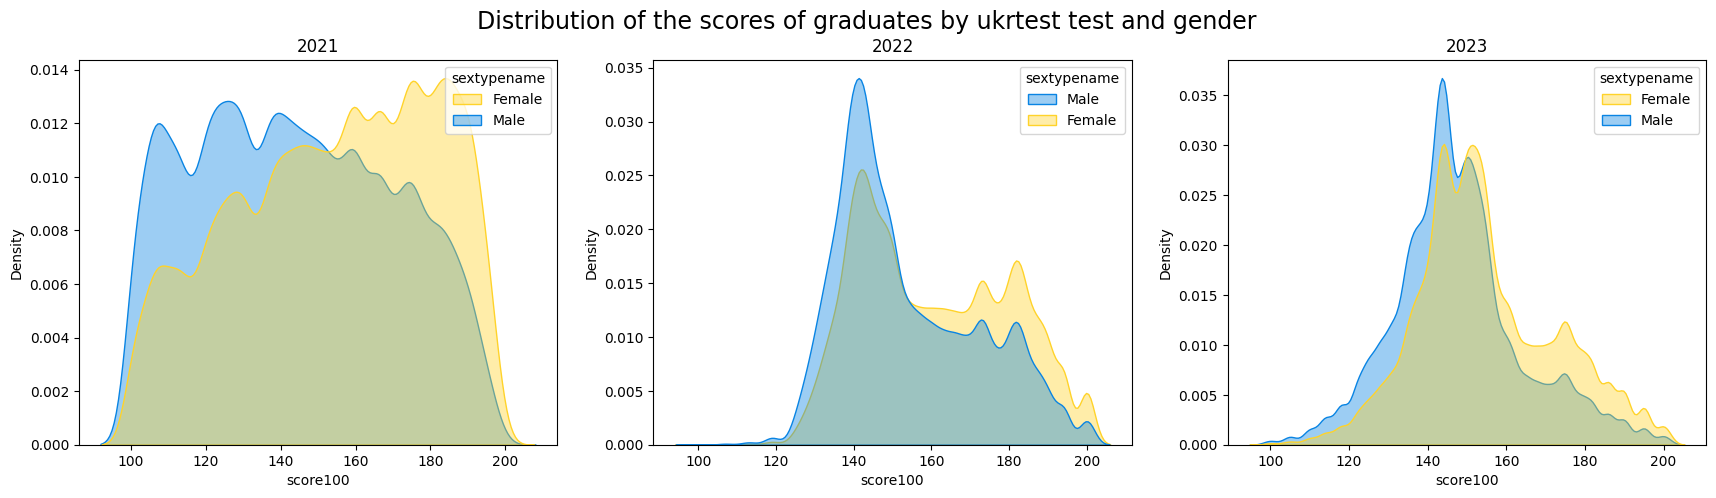

In [104]:

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'ukrtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=17)
plt.show()


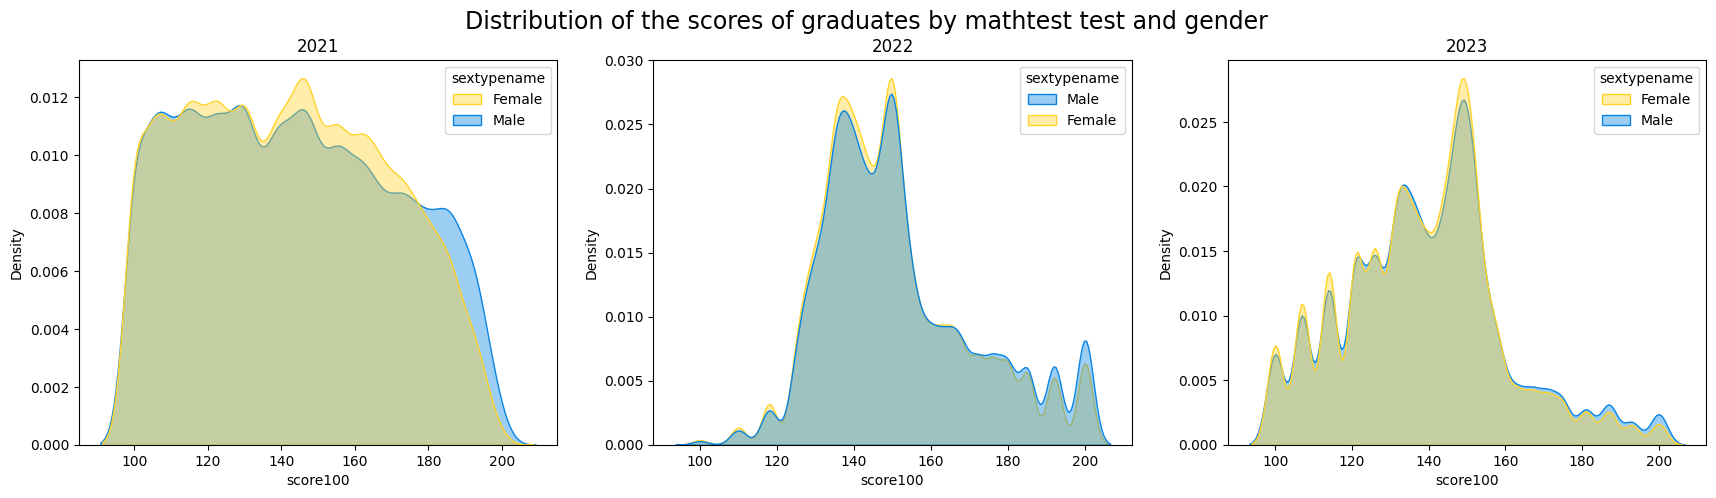

In [105]:

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'mathtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=17)
plt.show()


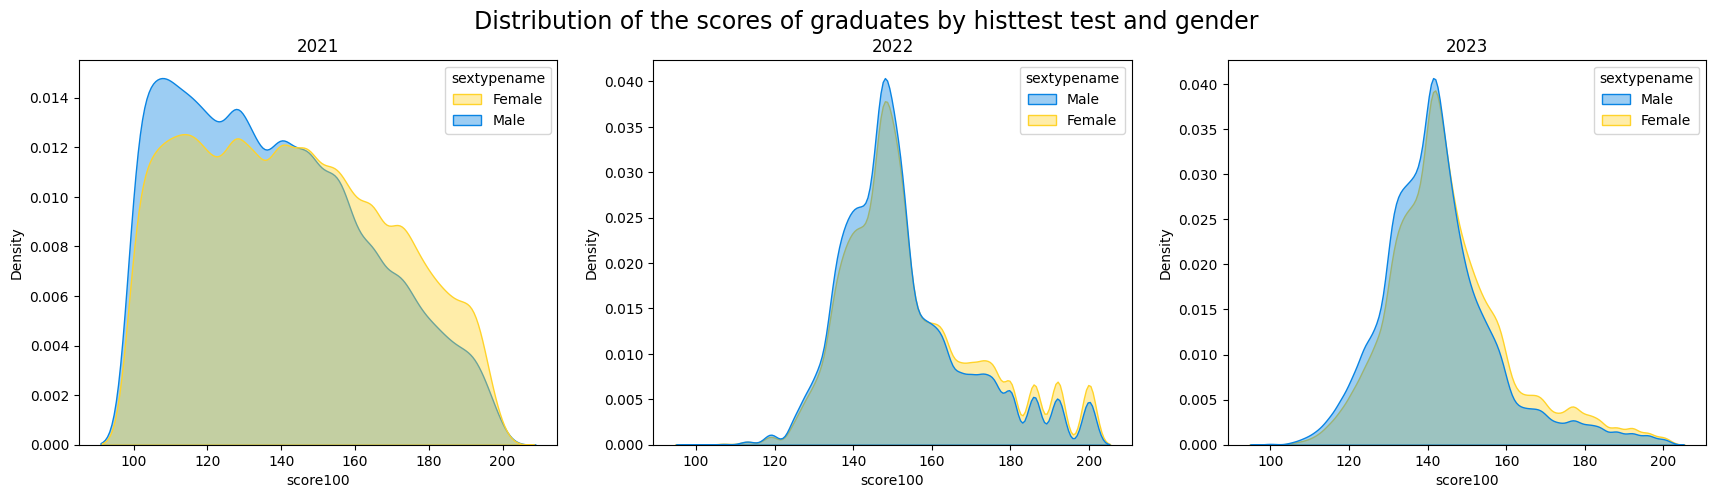

In [106]:

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'histtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=17)
plt.show()


Text(0.5, 0.98, 'Distribution of the scores of graduates by histtest test and gender')

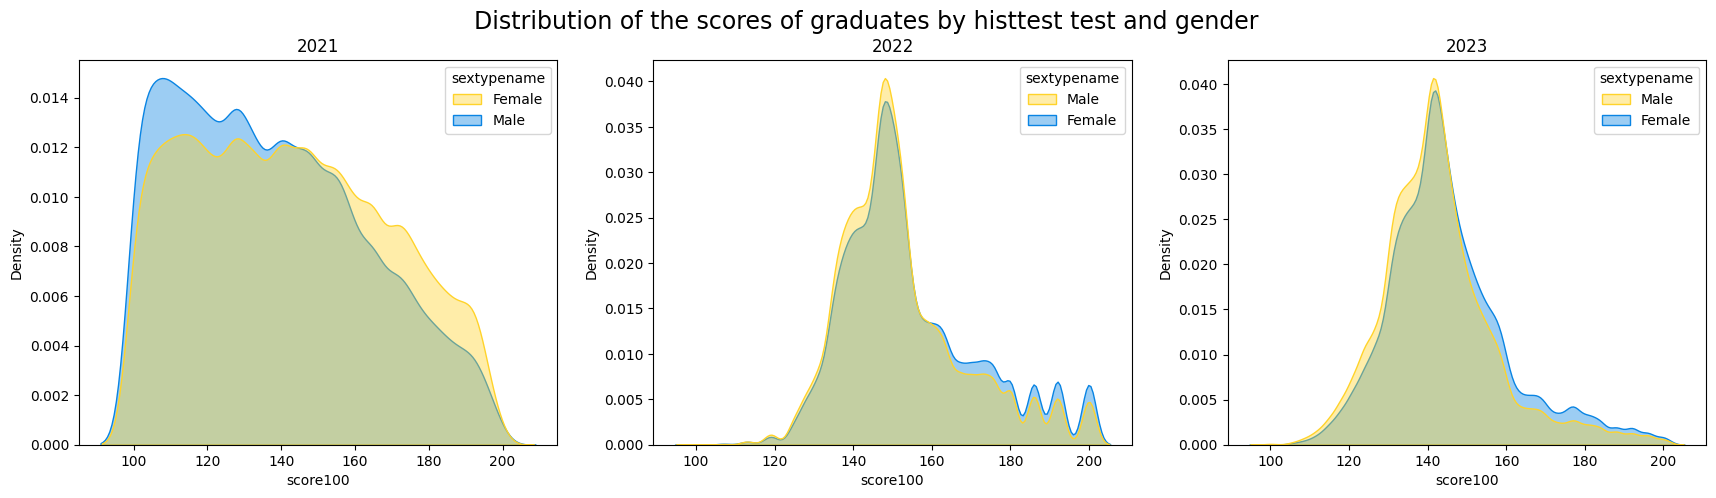

In [97]:
subject = 'histtest'
years = [2021, 2022, 2023]

fig, axs = plt.subplots(ncols=3,figsize=(21,5))

for i, year in enumerate(years):
    sns.kdeplot(data=df_graduated_tests[(df_graduated_tests.test_subject==subject)&(df_graduated_tests.test_status=='Accepted')&(df_graduated_tests.year==year)], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=17)

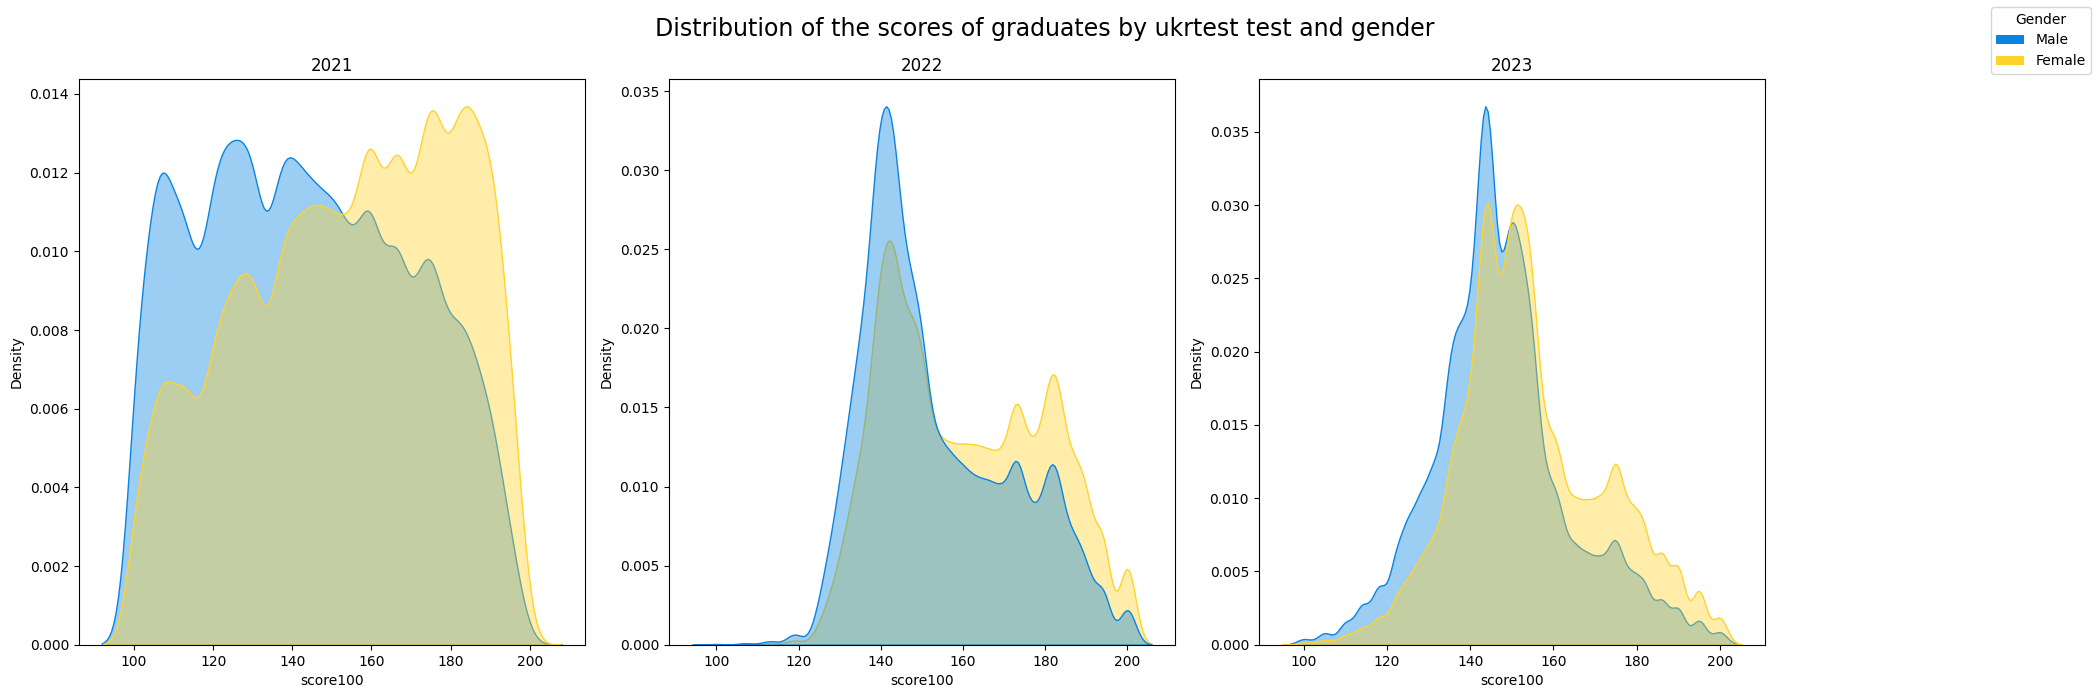

In [110]:

# Assuming df_graduated_tests is your DataFrame

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'ukrtest'
years = [2021, 2022, 2023]

# Define your color palette as a dictionary for consistent color assignment
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}  # Adjust keys as per your dataframe

fig, axs = plt.subplots(ncols=3, figsize=(21, 7))  # Adjusted for potential legend space

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette,  # Use the explicitly defined color palette
        legend=False  # Suppress individual legends
    )
    axs[i].set_title(f'{year}')

# Manually creating legend entries
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=color_palette['Male'], label='Male'),
                  Patch(facecolor=color_palette['Female'], label='Female')]

# Adding a unified legend to the figure
# You may need to adjust bbox_to_anchor values depending on your figure layout
fig.legend(handles=legend_handles, loc='upper right', title='Gender')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=17)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


# Ukrainian

In [30]:
df_ukr_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'ukrtest']
sum(df_ukr_graduated.duplicated())

0

In [31]:
df_ukr_graduated

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,UA51100270010275193,20995060,Female,23864660,A graduate of an Ukrainian school of the curre...,17,districts in cities,Odeska,0,districts in cities,UA51,Odeska
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,UA18060090010074365,22061344,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,UA63120270010216514,24486622,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,UA46100230010074173,34387362,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46,Lvivska
8,00003fa1-de6c-488e-a130-8acf4fb817ef,2019,167.0,7.0,69.0,Accepted,ukrtest,EIE,UA59080270010287243,00220078,Female,21117479,A graduate of an Ukrainian school of the curre...,17,districts in cities,Sumska,0,districts in cities,UA59,Sumska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456028,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,102.0,NaN,18.0,Accepted,ukrtest,EIE,UA51040010010048834,25417126,Male,25417118,A graduate of an Ukrainian school of the curre...,17,city,Odeska,0,city,UA51,Odeska
2456033,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,119.0,4.0,33.0,Accepted,ukrtest,EIE,UA32080090010037585,26078206,Male,25667248,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,city,UA32,Kyivska
2456034,ffffb656-a973-409c-92a8-5d1276874724,2019,137.0,6.0,44.0,Accepted,ukrtest,EIE,UA18060170010010060,06670569,Female,06670782,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
2456038,ffffd378-2c03-407d-8937-3a4acca43f94,2019,127.0,6.0,38.0,Accepted,ukrtest,EIE,UA53020030010087471,21064435,Female,25173440,A graduate of an Ukrainian school of the curre...,17,urban village,Poltavska,0,city,UA53,Poltavska


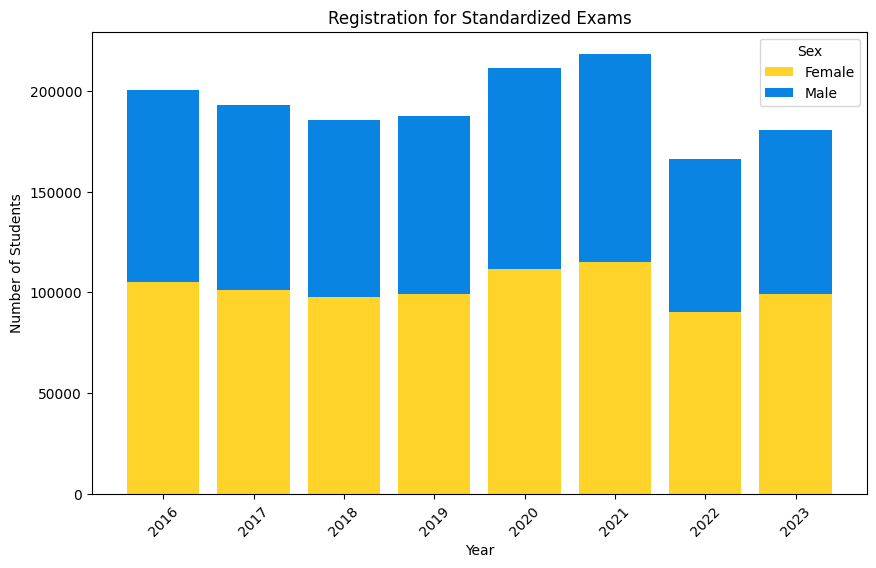

In [32]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')

plt.show()

Female
Male


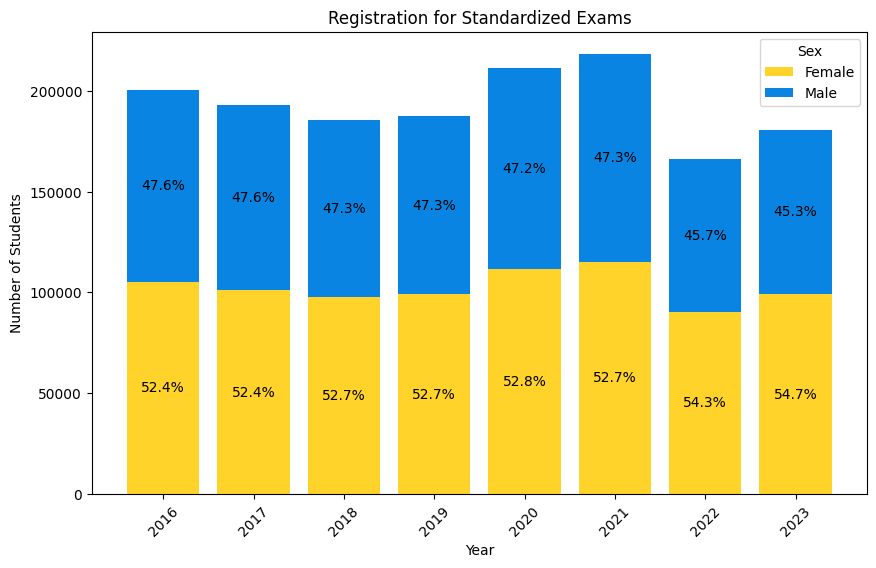

In [33]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

Female
Male


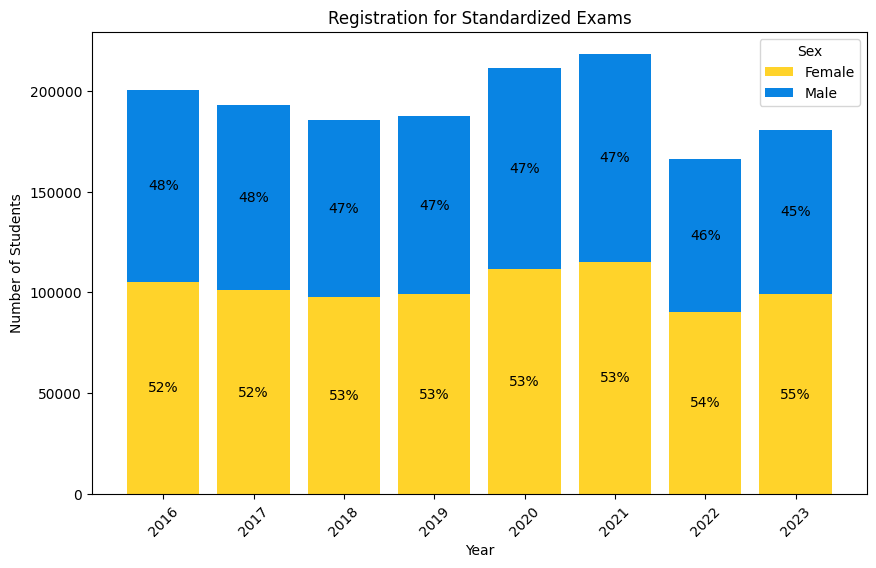

In [34]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

In [35]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center'],
      dtype='object')

Kyiv and Kyivska oblast

In [36]:
df_ukr_graduated[((df_ukr_graduated.region_name=='Kyiv')&(df_ukr_graduated.region_name_test_center=='Kyivska'))|((df_ukr_graduated.region_name=='Kyivska')&(df_ukr_graduated.region_name_test_center=='Kyiv'))][['year', 'region_name', 'region_name_test_center']].value_counts().head(25)

year  region_name  region_name_test_center
2016  Kyivska      Kyiv                       588
2023  Kyiv         Kyivska                    440
2022  Kyiv         Kyivska                    399
2023  Kyivska      Kyiv                       291
2022  Kyivska      Kyiv                       229
2016  Kyiv         Kyivska                     56
2021  Kyiv         Kyivska                     32
2020  Kyiv         Kyivska                      5
2021  Kyivska      Kyiv                         4
2017  Kyiv         Kyivska                      3
2020  Kyivska      Kyiv                         2
2019  Kyivska      Kyiv                         1
Name: count, dtype: int64

In [37]:
df_ukr_graduated[df_ukr_graduated.region_name.isin(['Kyiv', 'Kyivska'])&df_ukr_graduated.region_name_test_center.isin(['Kyiv', 'Kyivska'])][['year', 'region_name', 'region_name_test_center']].value_counts()

year  region_name  region_name_test_center
2021  Kyiv         Kyiv                       17958
2020  Kyiv         Kyiv                       16747
2019  Kyiv         Kyiv                       14884
2017  Kyiv         Kyiv                       14669
2018  Kyiv         Kyiv                       14542
2016  Kyiv         Kyiv                       13166
2023  Kyiv         Kyiv                       13078
2022  Kyiv         Kyiv                       10909
2021  Kyivska      Kyivska                    10368
2020  Kyivska      Kyivska                     9556
2023  Kyivska      Kyivska                     8511
2016  Kyivska      Kyivska                     8342
2017  Kyivska      Kyivska                     8082
2019  Kyivska      Kyivska                     7913
2022  Kyivska      Kyivska                     7661
2018  Kyivska      Kyivska                     7534
2016  Kyivska      Kyiv                         588
2023  Kyiv         Kyivska                      440
2022  Kyiv         Ky

In [38]:
df_ukr_graduated.category.unique()

array(['districts in cities', 'village', 'city', 'urban village',
       'settlement', 'abroad'], dtype=object)

In [39]:
df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/1016540739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [40]:
df_ukr_graduated.location_type.unique()

array(['Urban', 'Rural', 'Abroad'], dtype=object)

In [41]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type'],
      dtype='object')

In [42]:
df_pivot

sextypename,Female,Male
year,,
2016,105079,95466
2017,101000,91817
2018,97721,87629
2019,98963,88689
2020,111554,99629
2021,115123,103240
2022,90332,75995
2023,98991,81823


Rural
2016
2017
2018
2019
2020
2021
2022
2023
Urban
2016
2017
2018
2019
2020
2021
2022
2023


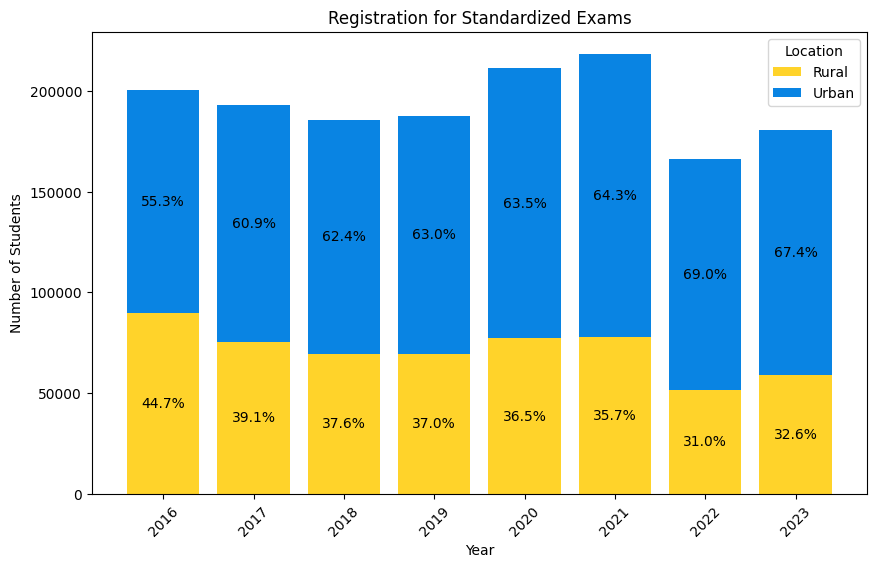

In [43]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated[df_ukr_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    print(loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100
        print(df_pivot.index[i-2016])

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

Rural
2016
2017
2018
2019
2020
2021
2022
2023
Urban
2016
2017
2018
2019
2020
2021
2022
2023


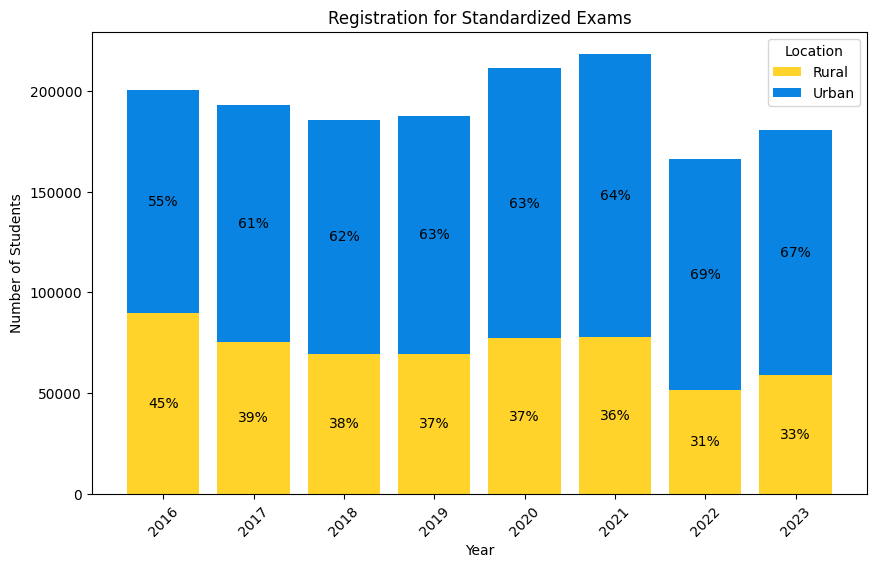

In [44]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated[df_ukr_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    print(loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100
        print(df_pivot.index[i-2016])

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

In [45]:
df_ukr_graduated['displaced'] = np.where(df_ukr_graduated['region_name'] != df_ukr_graduated['region_name_test_center'], 1, 0)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/3102505695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['displaced'] = np.where(df_ukr_graduated['region_name'] != df_ukr_graduated['region_name_test_center'], 1, 0)


In [46]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type', 'displaced'],
      dtype='object')

In [47]:
df_ukr_graduated.category_test_center.unique()

array(['districts in cities', 'city', 'abroad', 'urban village',
       'village', 'settlement'], dtype=object)

In [48]:
df_ukr_graduated['location_test_center_type'] = df_ukr_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/2184336049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['location_test_center_type'] = df_ukr_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [49]:
conditions = [
    (df_ukr_graduated['displaced'] == 0),
    (df_ukr_graduated['displaced'] == 1) & (df_ukr_graduated['location_test_center_type'] == 'Abroad'),
    (df_ukr_graduated['displaced'] == 1) & (df_ukr_graduated['location_test_center_type'] != 'Abroad')
]

choices = [
    'Non-displaced',
    'Displaced_abroad',
    'Displaced_internally'
]

df_ukr_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/2943676111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


In [50]:
df_ukr_graduated[['year', 'displaced']].value_counts()

year  displaced
2021  0            217586
2020  0            209844
2016  0            199323
2017  0            192308
2019  0            187240
2018  0            185014
2023  0            150730
2022  0            129764
      1             36563
2023  1             30084
2020  1              1339
2016  1              1222
2021  1               777
2017  1               509
2019  1               412
2018  1               336
Name: count, dtype: int64

In [51]:
df_ukr_graduated['test_center_type_gov'] = df_ukr_graduated.region_name_test_center.map(lambda x: 'frontline' if x in ['Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska'] else ('abroad' if x in ['Czechia', 'Austia', 'Germany', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy', 'United States of America', 'France', 'United Kingdom',
       'Switzerland', 'Bulgaria', 'Belgium', 'Hungary', 'Spain',
       'Ireland', 'Netherlands', 'Moldova', 'Estonia', 'Romania',
       'Portugal', 'Latvia', 'Luxembourg', 'Sweden', 'Denmark',
       'Slovenia', 'Croatia', 'Georgia', 'Greece', 'Finland', 'Turkey',
       'Norway', 'Azerbaijan'] else 'non-frontline'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/1063943710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['test_center_type_gov'] = df_ukr_graduated.region_name_test_center.map(lambda x: 'frontline' if x in ['Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska'] else ('abroad' if x in ['Czechia', 'Austia', 'Germany', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy', 'United States of America', 'France', 'United Kingdom',


In [52]:
df_ukr_graduated.test_status.unique()

array(['Accepted', 'Absent', 'Failed', 'Canceled', 'Not selected 100-200'],
      dtype=object)

In [53]:
df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200']

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,...,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center,location_type,displaced,location_test_center_type,displacement_type,test_center_type_gov
3022,0059750a-a626-40e3-a3f3-24db061e2f8e,2021,NaN,4.0,NaN,Not selected 100-200,ukrtest,EIE,UA21120130010065349,22099973,...,Zakarpatska,0,city,UA21,Zakarpatska,Rural,0,Urban,Non-displaced,non-frontline
4205,007c1497-6cf0-4886-9799-6dd36e8d668d,2021,NaN,9.0,NaN,Not selected 100-200,ukrtest,EIE,UA12020010010114149,33109300,...,Dnipropetrovska,0,districts in cities,UA12,Dnipropetrovska,Urban,0,Urban,Non-displaced,non-frontline
6439,00bbea74-fba5-4444-83ea-df1787878bb8,2021,NaN,4.0,NaN,Not selected 100-200,ukrtest,EIE,UA18040190010281147,01788183,...,Zhytomyrskа,0,districts in cities,UA18,Zhytomyrskа,Rural,0,Urban,Non-displaced,non-frontline
6805,00c87d78-6097-4873-bb87-aee67b41b956,2021,NaN,10.0,NaN,Not selected 100-200,ukrtest,EIE,UA63120270010158723,24481027,...,Kharkivska,0,districts in cities,UA63,Kharkivska,Urban,0,Urban,Non-displaced,frontline
8699,010677da-7ddc-4b29-ae98-7d817d40a973,2021,NaN,2.0,NaN,Not selected 100-200,ukrtest,EIE,UA21020110010043238,26397302,...,Zakarpatska,0,city,UA21,Zakarpatska,Rural,0,Urban,Non-displaced,non-frontline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438959,fdb689e9-f843-4072-9e12-8e4c65d8a938,2021,NaN,8.0,NaN,Not selected 100-200,ukrtest,EIE,UA23040030010016724,34524531,...,Zaporizka,0,city,UA23,Zaporizka,Rural,0,Urban,Non-displaced,frontline
2446442,feb6888b-0b5d-4865-b90d-81e0982e5af4,2021,NaN,3.0,NaN,Not selected 100-200,ukrtest,EIE,UA21120070060017663,22100133,...,Zakarpatska,0,village,UA21,Zakarpatska,Rural,0,Rural,Non-displaced,non-frontline
2453596,ffacd027-72f9-407a-8bf9-5b2090e0f78b,2021,NaN,7.0,NaN,Not selected 100-200,ukrtest,EIE,UA73060150010043412,21435914,...,Chernivetska,0,urban village,UA73,Chernivetska,Rural,0,Rural,Non-displaced,non-frontline
2454669,ffd20ad1-6d70-4d11-8a3b-2163725720ae,2021,NaN,2.0,NaN,Not selected 100-200,ukrtest,EIE,UA18040190010281147,01788183,...,Zhytomyrskа,0,districts in cities,UA18,Zhytomyrskа,Rural,0,Urban,Non-displaced,non-frontline


In [54]:
len(df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200'])

559

In [55]:
df_ukr_graduated[['score12', 'score100']].value_counts()

score12  score100
3.0      0.0         40791
2.0      0.0         26582
10.0     181.0        9079
11.0     190.0        9006
         188.0        8610
                     ...  
2.0      119.0           1
         121.0           1
         124.0           1
3.0      136.0           1
2.0      114.0           1
Name: count, Length: 559, dtype: int64

In [56]:
df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200'].score12.value_counts()

score12
3.0     146
2.0     116
4.0      75
5.0      48
7.0      42
6.0      40
9.0      26
8.0      23
11.0     14
10.0     12
1.0      12
12.0      5
Name: count, dtype: int64

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
df_ukr_graduated[df_ukr_graduated.score100.isna()].shape

(66801, 25)

In [59]:
data = df_ukr_graduated[['score100', 'score12']]
data.drop_duplicates(inplace=True)
data

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/990250651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,score100,score12
0,161.0,9.0
1,NaN,NaN
3,160.0,8.0
4,166.0,9.0
8,167.0,7.0
...,...,...
2055223,169.0,12.0
2056542,136.0,3.0
2128786,194.5,NaN
2174939,157.0,5.0


In [60]:
known_scores = data.dropna()
known_scores

,score100,score12
0,161.0,9.0
3,160.0,8.0
4,166.0,9.0
8,167.0,7.0
18,168.0,9.0
...,...,...
2000831,135.0,3.0
2055223,169.0,12.0
2056542,136.0,3.0
2174939,157.0,5.0


In [61]:
missing_scores = data[data['score100'].isna()]
missing_scores.dropna(how='all', inplace=True)
missing_scores

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/3194296155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_scores.dropna(how='all', inplace=True)


,score100,score12
2458,NaN,1.0
3022,NaN,4.0
4205,NaN,9.0
6805,NaN,10.0
8699,NaN,2.0
9885,NaN,5.0
14939,NaN,3.0
25717,NaN,7.0
28591,NaN,6.0
83822,NaN,12.0


In [62]:


# Training a KNN model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(known_scores[['score12']], known_scores['score100'])

# Predicting the missing score100 values
predicted_scores = knn.predict(missing_scores[['score12']])
missing_scores['score100'] = predicted_scores

# Combining the data back together
df_filled = pd.concat([known_scores, missing_scores])

# Sorting by index if needed to maintain original order
df_filled = df_filled.sort_index()
df_filled

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/2796684868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_scores['score100'] = predicted_scores


,score100,score12
0,161.0,9.0
3,160.0,8.0
4,166.0,9.0
8,167.0,7.0
18,168.0,9.0
...,...,...
2000831,135.0,3.0
2055223,169.0,12.0
2056542,136.0,3.0
2174939,157.0,5.0


In [63]:
df_ukr_graduated = df_ukr_graduated[df_ukr_graduated.test_status != 'Not selected 100-200']

In [64]:
df_ukr_graduated.test_status.unique()

array(['Accepted', 'Absent', 'Failed', 'Canceled'], dtype=object)

In [65]:
df_ukr_graduated_took_test = df_ukr_graduated[df_ukr_graduated.test_status != 'Absent']

In [66]:
df_ukr_graduated_took_test[['year', 'displaced']].value_counts()

year  displaced
2016  0            197797
2021  0            195737
2017  0            191084
2020  0            187275
2019  0            186308
2018  0            183975
2023  0            147650
2022  0            123645
      1             31811
2023  1             27085
2020  1              1236
2016  1              1203
2021  1               631
2017  1               504
2019  1               407
2018  1               334
Name: count, dtype: int64

In [67]:
df_ukr_graduated_took_test['test_status'] = df_ukr_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_95195/2678880665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated_took_test['test_status'] = df_ukr_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)


In [68]:
df_ukr_graduated_took_test.test_status.unique()

array(['Accepted', 'Failed'], dtype=object)

In [69]:
data = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Ukrainian test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution of failure Ukrainian test Graduate Students


outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.28  0.26  0.28  0.27  0.31  0.33  0.43  0.39
Male         0.72  0.74  0.72  0.73  0.69  0.67  0.57  0.61

In [70]:
data = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Ukrainian test Graduate Students')
print('2022 is weird since only 74 people failed from 155K')
pivot.div(total_pivot).round(2)

Distribution of failure Ukrainian test Graduate Students
2022 is weird since only 74 people failed from 155K


outid                                       
year           2016  2017  2018 2019 2020  2021 2022  2023
location_type                                             
Rural          0.76  0.75  0.73  0.7  0.6  0.56  0.3  0.52
Urban          0.24  0.25  0.27  0.3  0.4  0.44  0.7  0.48

In [71]:
data = df_ukr_graduated_took_test
pivot = pd.pivot_table(data, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Total accepted rate for Ukrainian test Graduate Students')
pivot.div(total_pivot).round(2)

Total accepted rate for Ukrainian test Graduate Students


outid                                        
year         2016  2017  2018  2019  2020  2021 2022 2023
test_status                                              
Accepted      0.9  0.92  0.92  0.92  0.94  0.95  1.0  1.0
Failed        0.1  0.08  0.08  0.08  0.06  0.05  0.0  0.0

In [72]:
pivot

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
test_status                                                                
Accepted     179625  176540  168969  170901  177368  185770  155382  174544
Failed        19375   15048   15340   15814   11143   10598      74     191

In [73]:
df_ukr_graduated_passed = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status=='Accepted']

In [74]:
df_ukr_graduated_passed[['year', 'displaced']].value_counts()

year  displaced
2021  0            185151
2016  0            178470
2020  0            176212
2017  0            176085
2019  0            170533
2018  0            168662
2023  0            147484
2022  0            123591
      1             31791
2023  1             27060
2020  1              1156
2016  1              1155
2021  1               619
2017  1               455
2019  1               368
2018  1               307
Name: count, dtype: int64

In [75]:
df_ukr_graduated_passed.test_center_type_gov.unique()

array(['non-frontline', 'frontline', 'abroad'], dtype=object)

In [76]:
grouped = df_ukr_graduated_passed.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Female'].median()),
              ('displaced_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 1].mean()),
              ('nondisplaced_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 0].mean()),
              ('displaced_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 1].median()),
              ('nondisplaced_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 0].median())],
    'location_type': [('urban_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median',  'displaced_mean', 'nondisplaced_mean', 'displaced_median', 'nondisplaced_median','urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped['F_M_mean'] = grouped['female_mean']-grouped['male_mean']
grouped['F_M_median'] = grouped['female_median']-grouped['male_median']
grouped['Non_Disp_mean'] = grouped['nondisplaced_mean']-grouped['displaced_mean']
grouped['Non_Disp_median'] = grouped['nondisplaced_median']-grouped['displaced_median']
grouped['U_R_mean'] = grouped['urban_mean']-grouped['rural_mean']
grouped['U_R_median'] = grouped['urban_median']-grouped['rural_median']
grouped['Non_Front_mean'] = grouped['non-frontline_test_center_mean']-grouped['frontline_test_center_mean']
grouped['Non_Front_median'] = grouped['non-frontline_test_center_median']-grouped['frontline_test_center_median']
grouped

,year,male_mean,female_mean,male_median,female_median,displaced_mean,nondisplaced_mean,displaced_median,nondisplaced_median,urban_mean,...,frontline_test_center_median,abroad_test_center_median,F_M_mean,F_M_median,Non_Disp_mean,Non_Disp_median,U_R_mean,U_R_median,Non_Front_mean,Non_Front_median
0,2016,141.550138,154.351821,139.0,157.0,152.254113,148.580574,152.0,149.0,155.051583,...,147.0,NaN,12.801682,18.0,-3.673539,-3.0,15.583197,22.0,2.076418,3.0
1,2017,140.512413,153.441618,138.0,155.0,146.503297,147.582755,146.0,148.0,153.412773,...,145.0,NaN,12.929205,17.0,1.079459,2.0,16.220189,22.0,2.039658,4.0
2,2018,145.058058,157.573730,145.0,162.0,152.807818,151.947748,155.0,155.0,157.440503,...,152.0,NaN,12.515672,17.0,-0.860070,0.0,16.002783,23.0,1.522664,3.0
3,2019,143.833781,156.243664,143.0,160.0,146.381793,150.682088,145.0,153.0,155.877729,...,150.0,NaN,12.409883,17.0,4.300294,8.0,15.374506,21.0,1.561858,3.0
4,2020,143.441634,154.789268,142.0,158.0,141.231834,149.819904,140.0,150.0,153.604280,...,148.0,NaN,11.347634,16.0,8.588071,10.0,12.463950,18.0,3.166246,4.0
5,2021,143.637314,154.252865,143.0,157.0,151.111470,149.505058,151.0,151.0,153.346376,...,149.0,NaN,10.615551,14.0,-1.606412,0.0,12.704032,16.0,1.692603,2.0
6,2022,153.837177,160.611547,149.0,157.0,158.673304,157.243456,154.0,151.0,159.803905,...,149.0,157.0,6.774369,8.0,-1.429848,-3.0,7.449818,10.0,2.172606,5.0
7,2023,147.723521,154.463370,146.0,152.0,151.365817,151.445438,149.0,149.0,154.132957,...,148.0,150.0,6.739849,6.0,0.079621,0.0,8.296010,7.0,1.347138,1.0


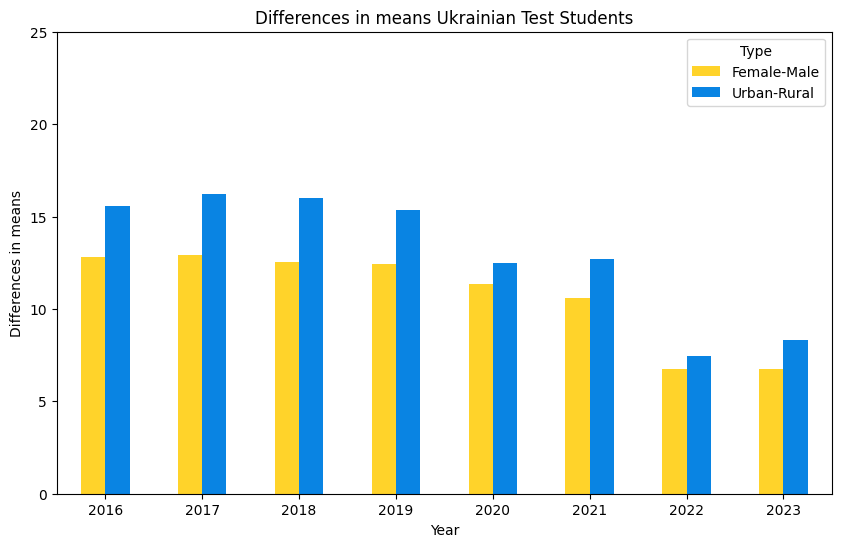

In [77]:
graph = grouped[['year', 'F_M_mean', 'U_R_mean']].set_index('year')
sns.set_palette(['#ffd32a','#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(10, 6))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in means')
plt.title('Differences in means Ukrainian Test Students')
plt.xticks(rotation=0)
plt.ylim(0, 25)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural'])
plt.show()


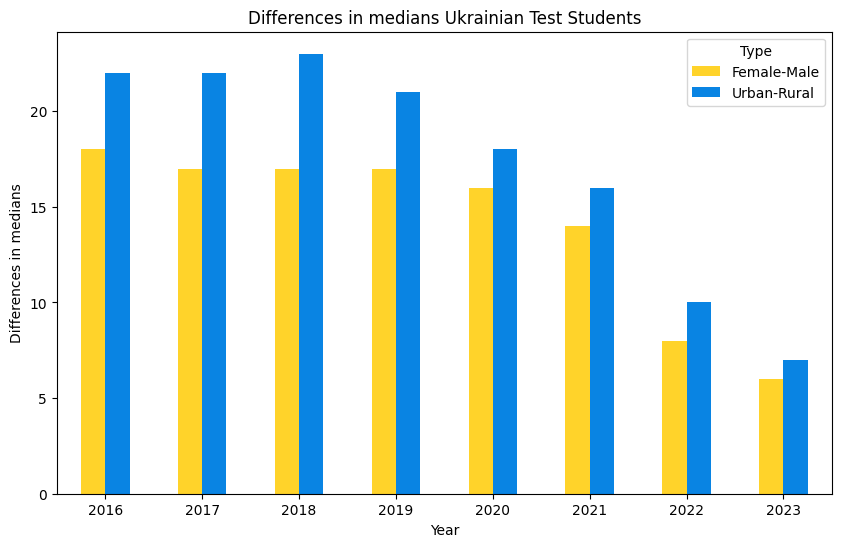

In [78]:
graph = grouped[['year', 'F_M_median', 'U_R_median']].set_index('year')
sns.set_palette(['#ffd32a', '#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(10, 6))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in medians')
plt.title('Differences in medians Ukrainian Test Students')
plt.xticks(rotation=0)
# plt.ylim(0, 20)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


# Graph2. Displacement performance


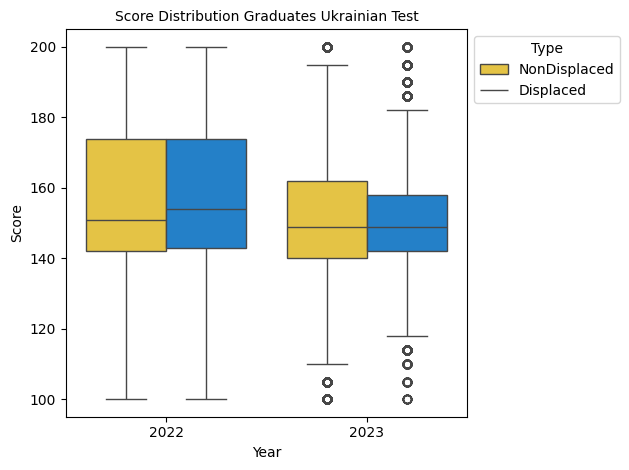

In [79]:
# Use seaborn boxplot to plot the scores

data = df_ukr_graduated_passed[df_ukr_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displaced')


plt.title(f'Score Distribution Graduates Ukrainian Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Type', bbox_to_anchor=(1, 1),  labels = ['NonDisplaced', 'Displaced'])

# Adjust layout to make room for the legend
plt.tight_layout()
# 
plt.show()


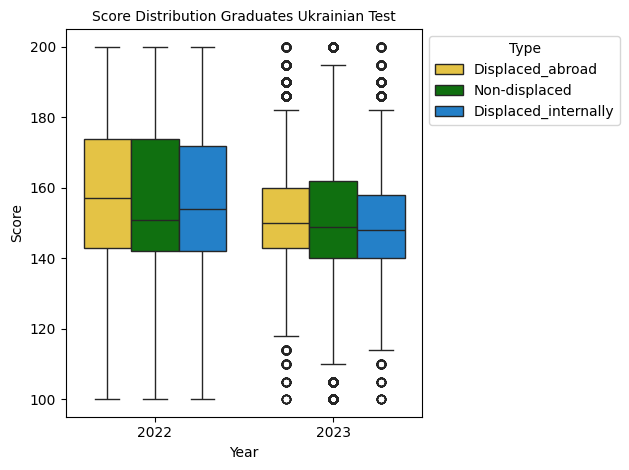

In [80]:
# Use seaborn boxplot to plot the scores

data = df_ukr_graduated_passed[df_ukr_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', 'green', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displacement_type')


plt.title(f'Score Distribution Graduates Ukrainian Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Type', bbox_to_anchor=(1, 1))
# labels = ['Non-displaced', 'Displaced_abroad', 'Displaced_internally']

# Adjust layout to make room for the legend
plt.tight_layout()
# 
plt.show()


In [81]:
pivot = pd.pivot_table(data, index = ['displacement_type'], columns = ['year'], values=['score100'], aggfunc='count')
pivot

score100        
year                     2022    2023
displacement_type                    
Displaced_abroad        19945   16958
Displaced_internally    11846   10102
Non-displaced          123591  147484

In [82]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type', 'displaced', 'location_test_center_type',
       'displacement_type', 'test_center_type_gov'],
      dtype='object')

In [83]:
data = df_ukr_graduated[df_ukr_graduated.displaced == 1]
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                         
year         2016  2017  2018  2019 2020  2021  2022  2023
sextypename                                               
Female       0.41  0.48  0.53  0.53  0.3  0.53  0.52  0.52
Male         0.59  0.52  0.47  0.47  0.7  0.47  0.48  0.48

In [84]:
data = df_ukr_graduated[df_ukr_graduated.displaced == 1]
pivot = pd.pivot_table(data, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year           2016  2017  2018  2019  2020  2021  2022  2023
location_type                                                
Rural          0.52  0.31  0.17  0.14  0.08  0.01  0.16  0.15
Urban          0.48  0.69  0.83  0.86  0.92  0.99  0.84  0.85

# Graph 3

In [85]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displaced==0)&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped1 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped1.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped1['F_M_mean'] = grouped1['female_mean']-grouped1['male_mean']
grouped1['F_M_median'] = grouped1['female_median']-grouped1['male_median']
grouped1['U_R_mean'] = grouped1['urban_mean']-grouped1['rural_mean']
grouped1['U_R_median'] = grouped1['urban_median']-grouped1['rural_median']
grouped1['Non_Front_mean'] = grouped1['non-frontline_test_center_mean']-grouped1['frontline_test_center_mean']
grouped1['Non_Front_median'] = grouped1['non-frontline_test_center_median']-grouped1['frontline_test_center_median']
grouped1

,year,male_mean,female_mean,male_median,female_median,urban_mean,rural_mean,abroad_mean,urban_median,rural_median,...,abroad_test_center_mean,non-frontline_test_center_median,frontline_test_center_median,abroad_test_center_median,F_M_mean,F_M_median,U_R_mean,U_R_median,Non_Front_mean,Non_Front_median
0,2022,153.391454,160.381936,147.0,157.0,159.863585,152.244188,NaN,157.0,147.0,...,NaN,154.0,151.0,NaN,6.990482,10.0,7.619397,10.0,2.166655,3.0
1,2023,147.617669,154.506944,146.0,152.0,154.614955,145.766720,143.1,152.0,144.0,...,143.1,149.0,148.0,144.0,6.889275,6.0,8.848235,8.0,1.361657,1.0


In [86]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displaced==1)&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped2 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped2.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped2['F_M_mean'] = grouped2['female_mean']-grouped2['male_mean']
grouped2['F_M_median'] = grouped2['female_median']-grouped2['male_median']
grouped2['U_R_mean'] = grouped2['urban_mean']-grouped2['rural_mean']
grouped2['U_R_median'] = grouped2['urban_median']-grouped2['rural_median']
grouped2['Non_Front_mean'] = grouped2['non-frontline_test_center_mean']-grouped2['frontline_test_center_mean']
grouped2['Non_Front_median'] = grouped2['non-frontline_test_center_median']-grouped2['frontline_test_center_median']
grouped2

,year,male_mean,female_mean,male_median,female_median,urban_mean,rural_mean,abroad_mean,urban_median,rural_median,...,abroad_test_center_mean,non-frontline_test_center_median,frontline_test_center_median,abroad_test_center_median,F_M_mean,F_M_median,U_R_mean,U_R_median,Non_Front_mean,Non_Front_median
0,2022,155.479973,161.545889,151.0,160.0,159.624588,153.326739,NaN,157.0,148.0,...,159.503134,154.0,149.0,157.0,6.065916,9.0,6.297849,9.0,2.783209,5.0
1,2023,148.259818,154.210564,146.0,152.0,152.156532,146.769637,NaN,150.0,145.0,...,152.034261,148.0,146.0,150.0,5.950746,6.0,5.386894,5.0,1.646206,2.0


Text(0.5, 1.0, 'Displaced')

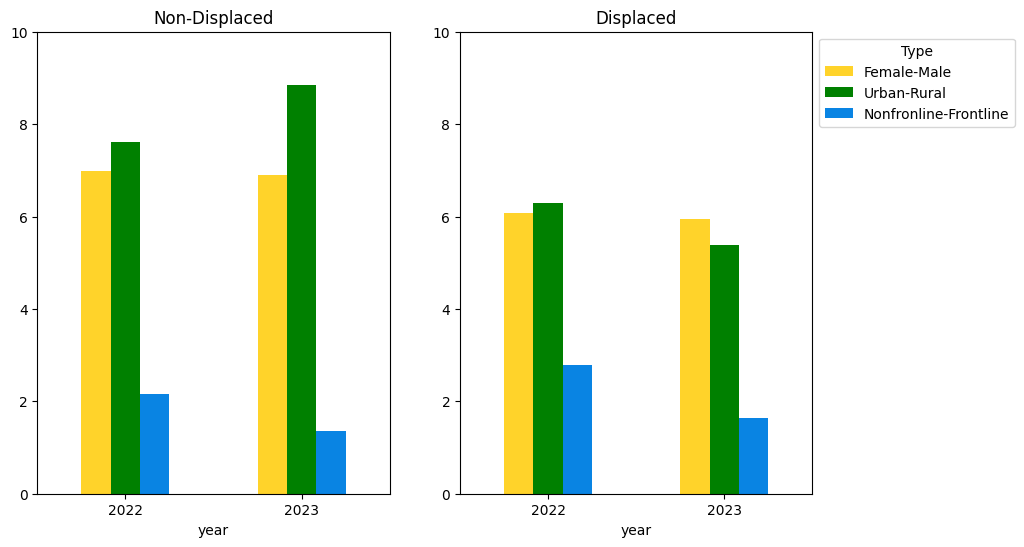

In [87]:
fig, axs = plt.subplots(ncols=2,figsize=(25,4))
sns.set_palette(['#ffd32a','green', '#0984e3'])
# fig.suptitle('Differences in means Ukrainian Test Students Displaced vs Non-Displaced')
graph1 = grouped1[['year', 'F_M_mean', 'U_R_mean', 'Non_Front_mean']].set_index('year')
graph1.plot(kind='bar', figsize=(10, 6), ax=axs[0])
axs[0].set_ylim(0, 10)
graph2 = grouped2[['year', 'F_M_mean', 'U_R_mean', 'Non_Front_mean']].set_index('year')
graph2.plot(kind='bar', figsize=(10, 6), ax=axs[1])

# plt.setp(axs, xlim=(0, 10), ylim=(0, 10))

axs[1].set_ylim(0, 10)
axs[0].tick_params(labelrotation=0)
axs[1].tick_params(labelrotation=0)
# axs[0].legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'Nonfronline-Frontline'], bbox_to_anchor=(1, 1), loc='upper left')
axs[0].get_legend().remove()
axs[1].legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'Nonfronline-Frontline'], bbox_to_anchor=(1, 1), loc='upper left')
axs[0].set_title('Non-Displaced')
axs[1].set_title('Displaced')

In [88]:
df_ukr_graduated_passed.displacement_type.unique()

array(['Non-displaced', 'Displaced_abroad', 'Displaced_internally'],
      dtype=object)

In [89]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displacement_type=='Non-displaced')&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped1 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped1.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped1['F_M_mean'] = grouped1['female_mean']-grouped1['male_mean']
grouped1['F_M_median'] = grouped1['female_median']-grouped1['male_median']
grouped1['U_R_mean'] = grouped1['urban_mean']-grouped1['rural_mean']
grouped1['U_R_median'] = grouped1['urban_median']-grouped1['rural_median']
grouped1['Non_Front_mean'] = grouped1['non-frontline_test_center_mean']-grouped1['frontline_test_center_mean']
grouped1['Non_Front_median'] = grouped1['non-frontline_test_center_median']-grouped1['frontline_test_center_median']
grouped1

,year,male_mean,female_mean,male_median,female_median,urban_mean,rural_mean,abroad_mean,urban_median,rural_median,...,abroad_test_center_mean,non-frontline_test_center_median,frontline_test_center_median,abroad_test_center_median,F_M_mean,F_M_median,U_R_mean,U_R_median,Non_Front_mean,Non_Front_median
0,2022,153.391454,160.381936,147.0,157.0,159.863585,152.244188,NaN,157.0,147.0,...,NaN,154.0,151.0,NaN,6.990482,10.0,7.619397,10.0,2.166655,3.0
1,2023,147.617669,154.506944,146.0,152.0,154.614955,145.766720,143.1,152.0,144.0,...,143.1,149.0,148.0,144.0,6.889275,6.0,8.848235,8.0,1.361657,1.0


In [90]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed..displacement_type=='Non-displaced')&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped2 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped2.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped2['F_M_mean'] = grouped2['female_mean']-grouped2['male_mean']
grouped2['F_M_median'] = grouped2['female_median']-grouped2['male_median']
grouped2['U_R_mean'] = grouped2['urban_mean']-grouped2['rural_mean']
grouped2['U_R_median'] = grouped2['urban_median']-grouped2['rural_median']
grouped2['Non_Front_mean'] = grouped2['non-frontline_test_center_mean']-grouped2['frontline_test_center_mean']
grouped2['Non_Front_median'] = grouped2['non-frontline_test_center_median']-grouped2['frontline_test_center_median']
grouped2

SyntaxError: invalid syntax (2966299966.py, line 1)

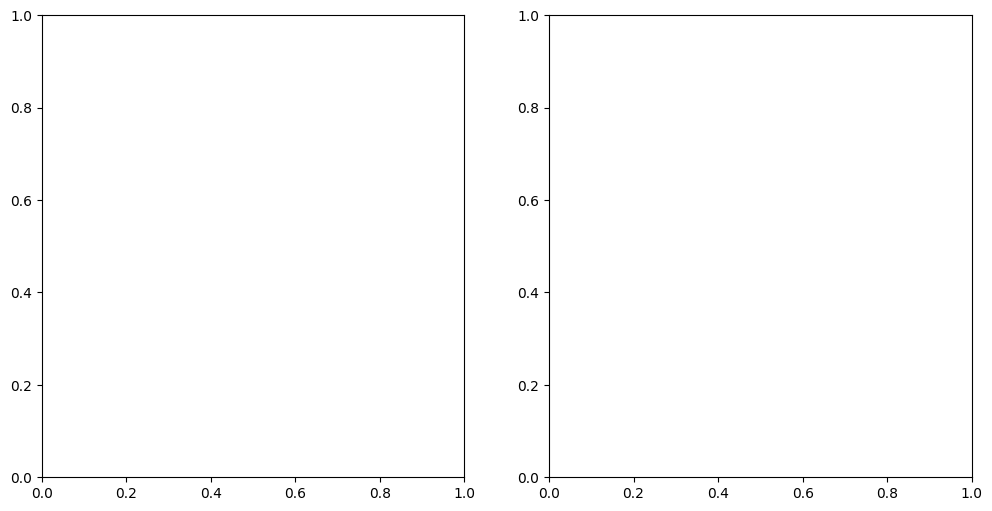

In [ ]:


# Plotting
ax = 

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in means')
plt.title('Differences in means Ukrainian Test Students')
plt.xticks(rotation=0)

# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


In [ ]:




sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
axs[i].set_title(f'{subject}')

plt.suptitle(f'Distribution of the scores of participants (16-17 years old) by test and gender in {year}', fontsize=17)

In [ ]:
graph = grouped[['year', 'F_M_median', 'U_R_median']].set_index('year')
sns.set_palette(['#ffd32a', '#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(10, 6))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in medians')
plt.title('Differences in medians Ukrainian Test Students')
plt.xticks(rotation=0)
# plt.ylim(0, 20)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_37669/1384190755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ukr_graduated_passed, x='year', y='score100',  palette='YlGnBu')


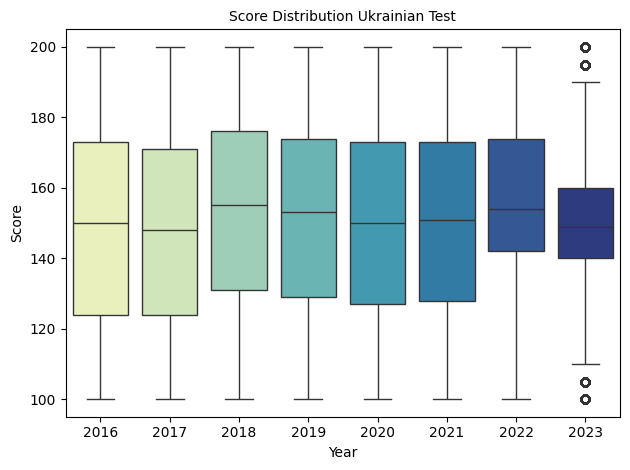

In [ ]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_ukr_graduated_passed, x='year', y='score100',  palette='YlGnBu')

plt.title('Score Distribution Ukrainian Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
# plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


# Math

In [ ]:
df_math_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'mathtest']
sum(df_math_graduated.duplicated())

0

In [ ]:
df_math_graduated

,outid,year,score100,score12,score,test_status,test_subject,test_type,KATOTTG_2023_test_center,EDRPOU_test_center,sextypename,EDRPOU_school,status,age,category,region_name,abroad,category_test_center,KATOTTG_2023_region_test_center,region_name_test_center
4181284,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,mathtest,EIE,UA18060090010074365,22050043,Male,22056432,A graduate of an Ukrainian school of the curre...,17,village,Zhytomyrskа,0,city,UA18,Zhytomyrskа
4181285,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,181.0,11.0,NaN,Accepted,mathtest,EIE,UA63120270010948820,02071197,Male,23320374,A graduate of an Ukrainian school of the curre...,18,districts in cities,Kharkivska,0,districts in cities,UA63,Kharkivska
4181286,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,172.0,9.0,42.0,Accepted,mathtest,EIE,UA46100230010074173,02545471,Male,20773804,A graduate of an Ukrainian school of the curre...,17,city,Lvivska,0,city,UA46,Lvivska
4181289,000051f8-9476-49b5-83c2-4797a201b706,2021,133.0,6.0,21.0,Accepted,mathtest,EIE,UA46120090010078401,22375166,Female,22375255,A graduate of an Ukrainian school of the curre...,18,village,Lvivska,0,city,UA46,Lvivska
4181291,000069ec-4f21-4e21-9dd9-58bc986d1a0e,2022,149.0,NaN,15.0,Accepted,mathtest,NMT,OC32010000000000000,NaN,Male,41554418,A graduate of an Ukrainian school of the curre...,18,urban village,Dnipropetrovska,0,abroad,OC32,Czechia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700265,ffff6f3c-08bd-4204-aae2-3260fd5ca334,2021,151.0,8.0,30.0,Accepted,mathtest,EIE,UA12080050010010114,20250006,Female,21929680,A graduate of an Ukrainian school of the curre...,17,city,Dnipropetrovska,0,city,UA12,Dnipropetrovska
5700266,ffff778c-a380-4885-b293-94b1b4877945,2021,100.0,4.0,10.0,Accepted,mathtest,EIE,UA32040010010093209,41993784,Male,22203206,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,city,UA32,Kyivska
5700267,ffff8e58-5322-4b21-a385-d1fee504c2a8,2021,122.0,5.0,16.0,Accepted,mathtest,EIE,UA51040010010048834,00728546,Male,25417118,A graduate of an Ukrainian school of the curre...,17,city,Odeska,0,city,UA51,Odeska
5700268,ffffb2e5-b2a1-4f51-871b-d281c20e72e8,2019,104.0,4.0,12.0,Accepted,mathtest,EIE,UA32080090010037585,25668443,Male,25667248,A graduate of an Ukrainian school of the curre...,17,village,Kyivska,0,city,UA32,Kyivska


In [ ]:
df_math_graduated['location_type'] = df_math_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/2832018361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['location_type'] = df_math_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [ ]:

subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.29  0.36  0.34  0.34  0.31  0.32  NaN  0.12
chemtest      0.10  0.09  0.08  0.06  0.04  0.04  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.34  0.35  0.39  0.42  0.42  0.48  NaN  0.33
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.22  0.32  0.37  0.37  0.40  0.48  NaN   NaN
histtest      0.74  0.77  0.75  0.70  0.69  0.75  1.0  0.50
mathsttest     NaN   NaN   NaN   NaN   NaN  0.17  NaN   NaN
mathtest      0.49  0.48  0.48  0.52  0.54  0.83  1.0  1.00
phystest      0.12  0.11  0.09  0.09  0.09  0.10  NaN  0.02
rustest       0.01  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  1.00  1.00  1.00  0.99  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.74  NaN   NaN

Female
Male


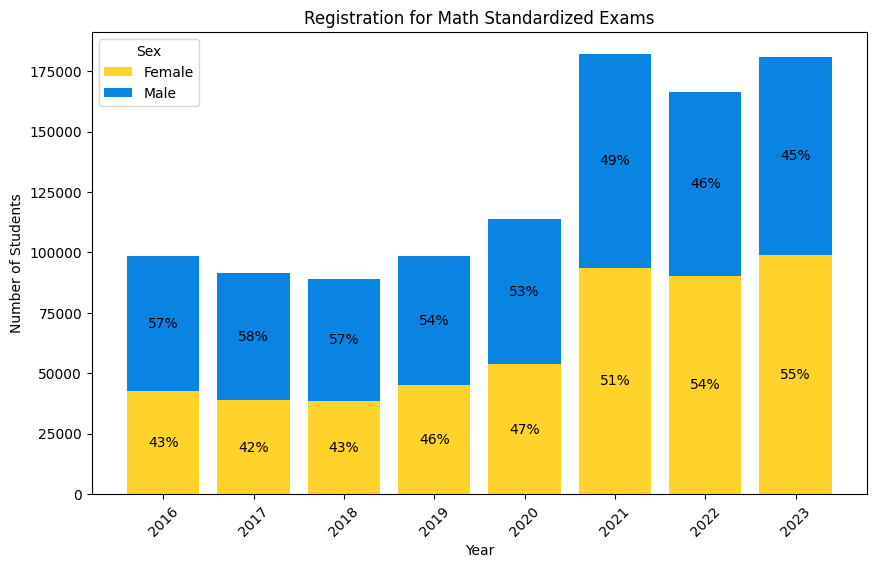

In [ ]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_math_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Math Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

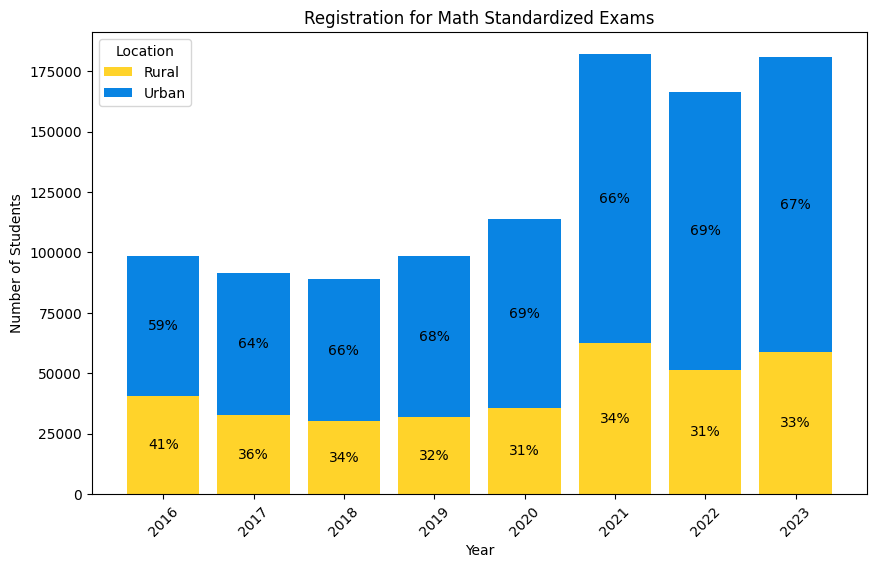

In [ ]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_math_graduated[df_math_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Math Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

In [ ]:
df_math_graduated['displaced'] = np.where(df_math_graduated['region_name'] != df_math_graduated['region_name_test_center'], 1, 0)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/3779538540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['displaced'] = np.where(df_math_graduated['region_name'] != df_math_graduated['region_name_test_center'], 1, 0)


In [ ]:
df_math_graduated['location_test_center_type'] = df_math_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/2353933480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['location_test_center_type'] = df_math_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [ ]:
conditions = [
    (df_math_graduated['displaced'] == 0),
    (df_math_graduated['displaced'] == 1) & (df_math_graduated['location_test_center_type'] == 'Abroad'),
    (df_math_graduated['displaced'] == 1) & (df_math_graduated['location_test_center_type'] != 'Abroad')
]

choices = [
    'Non-displaced',
    'Displaced_abroad',
    'Displaced_internally'
]

df_math_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/2046147604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


In [ ]:
df_math_graduated.test_status.unique()

array(['Absent', 'Accepted', 'Failed', 'Canceled'], dtype=object)

In [ ]:
len(df_math_graduated[df_math_graduated.test_status == 'Not selected 100-200'])

131

In [ ]:
df_math_graduated = df_math_graduated[df_math_graduated.test_status != 'Not selected 100-200']

In [ ]:
df_math_graduated_took_test = df_math_graduated[df_math_graduated.test_status != 'Absent']

In [ ]:
df_math_graduated_took_test['test_status'] = df_math_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/1537820888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated_took_test['test_status'] = df_math_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)


In [ ]:
df_math_graduated_took_test.test_status.unique()

array(['Accepted', 'Failed'], dtype=object)

In [ ]:
data = df_math_graduated_took_test
pivot = pd.pivot_table(data, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution test status Math test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution test status Math test Graduate Students


outid                                         
year         2016  2017  2018  2019  2020  2021 2022  2023
test_status                                               
Accepted     0.87  0.86  0.85  0.89  0.91  0.75  1.0  0.96
Failed       0.13  0.14  0.15  0.11  0.09  0.25  0.0  0.04

In [ ]:
data = df_math_graduated_took_test[df_math_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Math test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution of failure Math test Graduate Students


outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.35  0.33  0.37  0.39  0.45  0.52  0.54  0.58
Male         0.65  0.67  0.63  0.61  0.55  0.48  0.46  0.42

In [ ]:
df_math_graduated_passed = df_math_graduated_took_test[df_math_graduated_took_test.test_status=='Accepted']

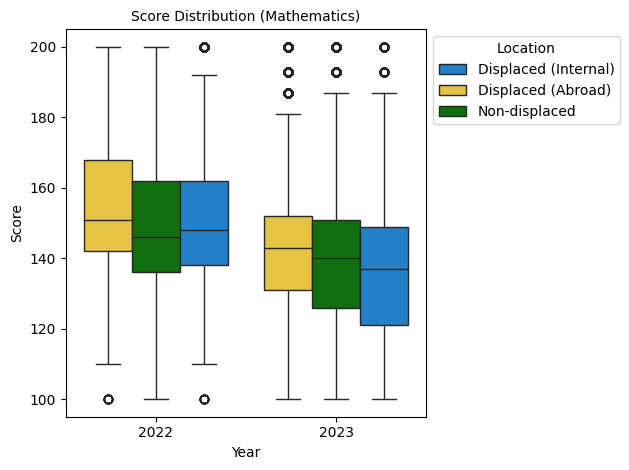

In [ ]:
# Use seaborn boxplot to plot the scores

data = df_math_graduated_passed[df_math_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', 'green', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displacement_type')


plt.title(f'Score Distribution (Mathematics)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

handles, labels = plt.gca().get_legend_handles_labels()
# Define your new labels
new_labels = ['Displaced (Abroad)', 'Non-displaced', 'Displaced (Internal)']

order = [2,0,1]

#add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# Create the legend with the new labels
plt.legend([handles[idx] for idx in order],[new_labels[idx] for idx in order], title='Location', bbox_to_anchor=(1, 1))

# plt.legend(title='Type', bbox_to_anchor=(1, 1), labels = ['Displaced (Abroad)', 'Non-displaced', 'Displaced (Internal)'])

# Adjust layout to make room for the legend
plt.tight_layout()
# 
plt.show()


In [ ]:
pivot = pd.pivot_table(data, index = ['displacement_type'], columns = ['year'], values=['score100'], aggfunc='count')
pivot

score100        
year                     2022    2023
displacement_type                    
Displaced_abroad        19945   16582
Displaced_internally    11840    9748
Non-displaced          123514  142077

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_60956/1688701977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_math_graduated_passed, x='year', y='score100',  palette='YlGnBu')


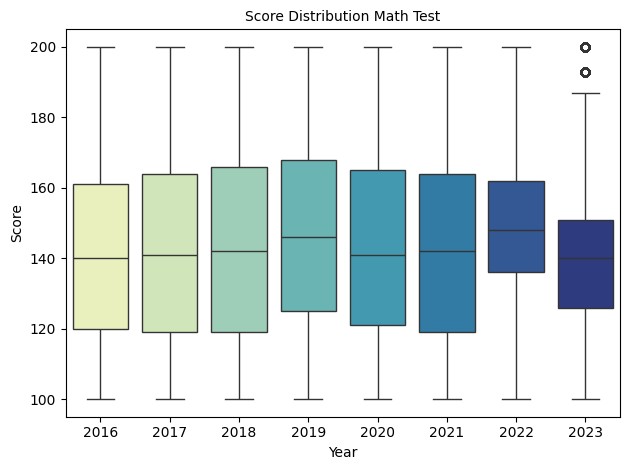

In [ ]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_math_graduated_passed, x='year', y='score100',  palette='YlGnBu')

plt.title('Score Distribution Math Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
# plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()
